## Méthode du KMeans

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=500,centers=3,cluster_std=0.5,random_state=0)

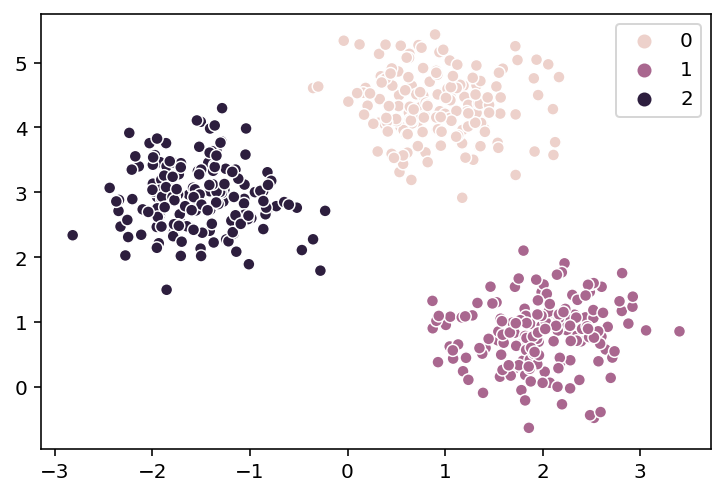

In [4]:
;  

In [5]:
from sklearn.cluster import KMeans

In [6]:
model=KMeans(n_clusters=3)

In [7]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
predictions=model.predict(X)

Text(0.5, 1.0, 'Clusters avec centroïds')

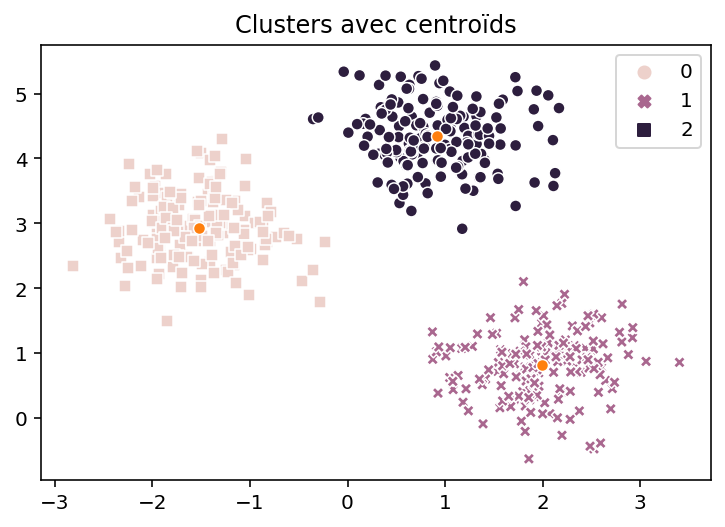

In [9]:
sns.scatterplot(X[:,0],X[:,1],hue=predictions,style=y)
sns.scatterplot(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='o')
plt.title('Clusters avec centroïds')

In [10]:
model.cluster_centers_

array([[-1.51954438,  2.9270622 ],
       [ 1.9929212 ,  0.81377992],
       [ 0.9207275 ,  4.33950727]])

In [11]:
model.labels_[:20]#appartenance des 20 premiers points aux différents clusters

array([2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2],
      dtype=int32)

In [12]:
model.transform(X)[:20] #donne les distances des 20 premiers points par rapport aux centroïds
#pour le coup on voit à quel cluster appartient le point

array([[3.00650383, 3.81209618, 0.20365758],
       [0.41091479, 4.46562204, 2.85448904],
       [0.59542946, 4.09029737, 3.33024313],
       [2.87264446, 2.77052901, 0.92398692],
       [2.12084115, 4.09723018, 0.91448126],
       [2.94786111, 3.84490958, 0.18319715],
       [2.19009962, 2.72906846, 1.17791089],
       [0.53962309, 4.32418224, 2.50832699],
       [0.14057416, 4.05719033, 2.68150124],
       [2.97412593, 2.96608239, 0.76243087],
       [0.79162573, 4.83411412, 2.99575709],
       [0.40179527, 4.33194725, 2.65504892],
       [0.63339959, 4.28192308, 3.43202664],
       [0.62448246, 3.47472075, 2.57966858],
       [2.16584722, 3.66425769, 0.65873208],
       [2.64807085, 3.32854129, 0.37582571],
       [5.28466078, 1.39237077, 5.07264468],
       [4.12067995, 4.15877885, 1.30124789],
       [0.24269106, 3.88206558, 2.62531713],
       [2.79763329, 3.59245259, 0.09273079]])

In [13]:
from sklearn import metrics

In [14]:
silhouette_samples=metrics.silhouette_samples(X,model.labels_) #la silhouette mesure les propo

In [15]:
silhouette_score=metrics.silhouette_score(X,model.labels_)

In [1]:
silhouette_score  #un bon score, car proche de 1, cela signifie que les points ont été bien mis dans un cluster
#ce score représente la moyenne des silhouette_samples

NameError: name 'silhouette_score' is not defined

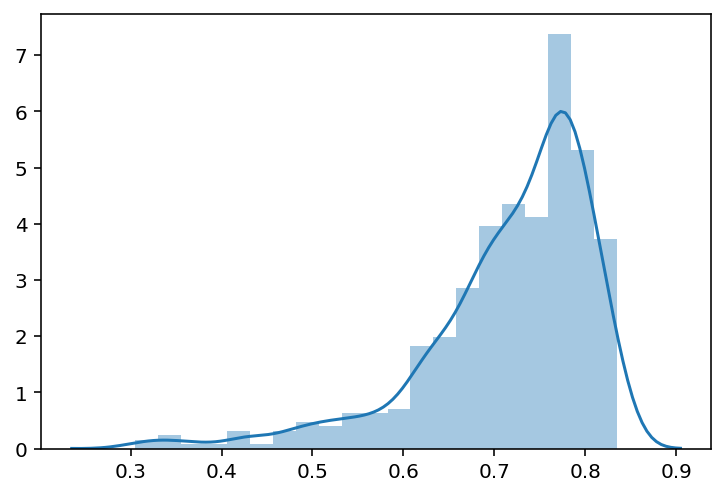

In [17]:
sns.distplot(silhouette_samples) #la distribution des distances plus c'est proche de 1, mieux c'est

In [18]:
silhouette_samples.mean()

0.7164181273749121

In [19]:
silhouette=[]
for k in range(2,30):
    model=KMeans(n_clusters=k).fit(X)
    silhouette.append(metrics.silhouette_score(X,model.labels_))


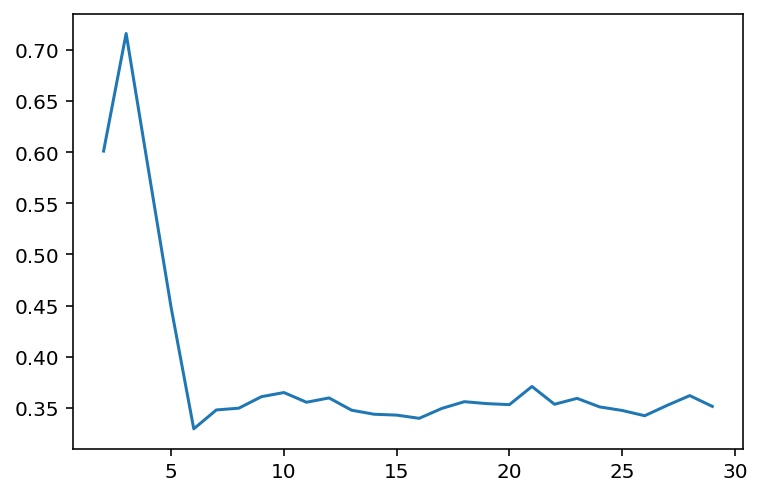

In [20]:
sns.lineplot(range(2,30),silhouette) #permet de trouver le nombre de cluster optimal quand silhouette est max
#on voit que quand le nuage est dispersé, le nombre optimum de clusters grandit pour se rapprocher du nombre de points !

In [21]:
X, y = make_blobs(n_samples=500,centers=3,cluster_std=2,random_state=0)

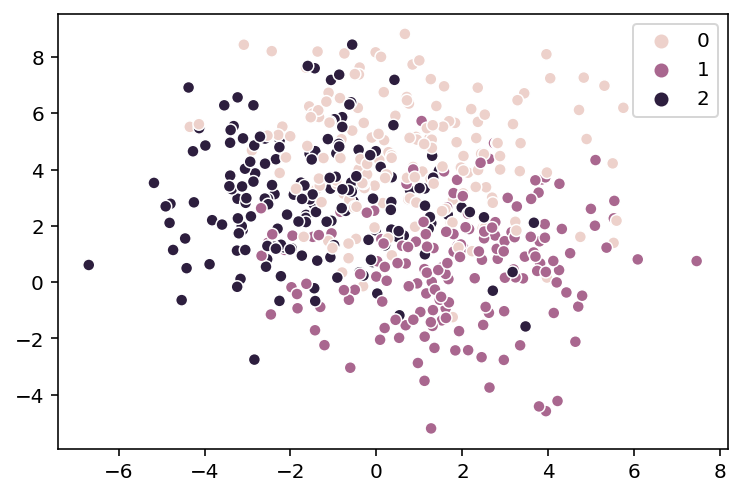

In [22]:
sns.scatterplot(X[:,0],X[:,1],hue=y)

In [23]:
silhouette=[]
for k in range(2,200):
    model=KMeans(n_clusters=k).fit(X)
    silhouette.append(metrics.silhouette_score(X,model.labels_))


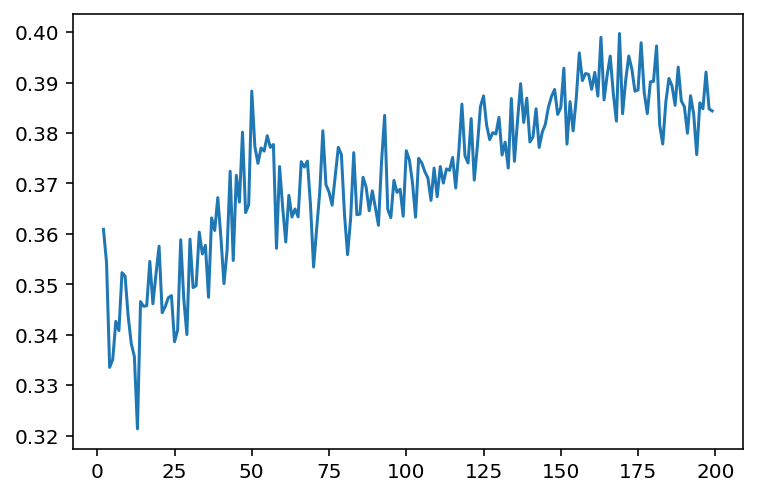

In [24]:
sns.lineplot(range(2,200),silhouette) 

In [25]:
from sklearn import datasets
from sklearn import cluster

In [26]:
X2,y2=datasets.make_blobs(1000,centers=3,cluster_std=1.75)

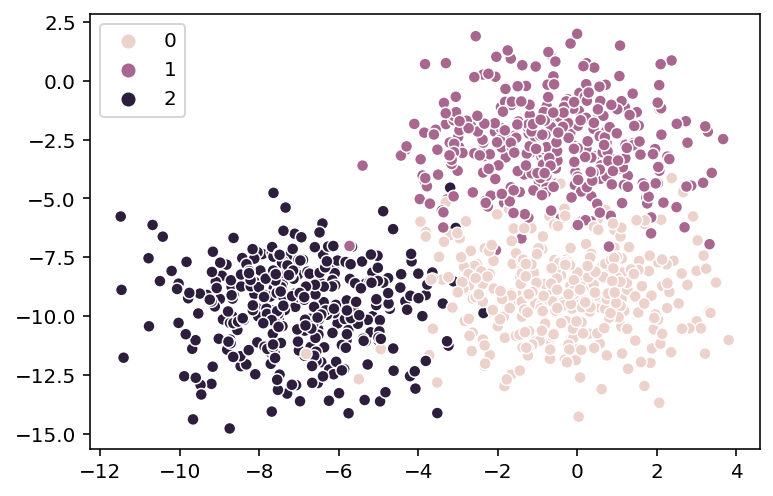

In [27]:
sns.scatterplot(X2[:,0],X2[:,1],hue=y2)

In [28]:
model2=cluster.KMeans(n_clusters=3)

In [29]:
model2.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
model2.cluster_centers_

array([[-0.26711198, -8.98015798],
       [-7.05097894, -9.70940479],
       [-0.72148748, -2.67378153]])

Text(0.5, 1.0, 'Clusters avec centroïds')

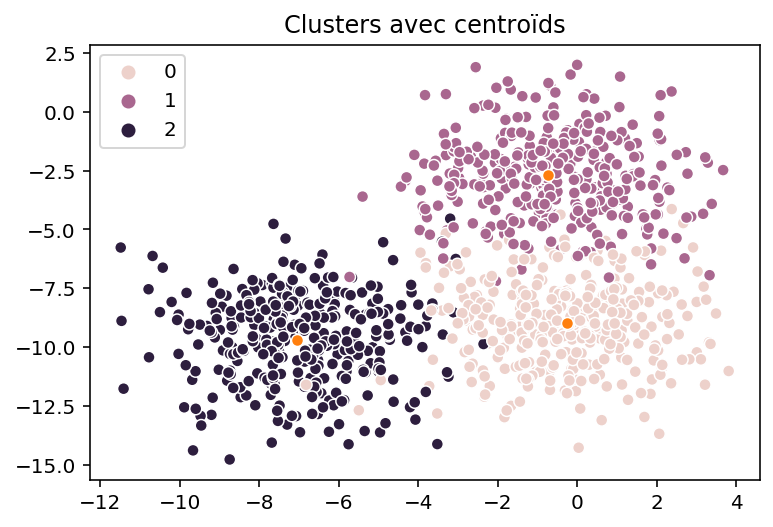

In [31]:
sns.scatterplot(X2[:,0],X2[:,1],hue=y2)
sns.scatterplot(model2.cluster_centers_[:,0],model2.cluster_centers_[:,1],marker='o')
plt.title('Clusters avec centroïds')

In [32]:
metrics.normalized_mutual_info_score(y2,model2.labels_) #coefficient de corrélation entre les nuages de points
        



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.8155646874685214

In [33]:
model2.inertia_  #c'est la somme de la différence au carré entre chaque point et son centroïd de cluster

5883.8080917347015

## KMeans par MiniBatch car la méthode KMeans est extrémement gourmande en mémoire

In [34]:
from sklearn.cluster import MiniBatchKMeans

In [35]:
blobs, labels = make_blobs(int(1e6), 3)

In [36]:
kmeans=KMeans(n_clusters=3)
minibatch=MiniBatchKMeans(n_clusters=3)

In [37]:
%time kmeans.fit(blobs)

CPU times: user 7.48 s, sys: 3.13 s, total: 10.6 s
Wall time: 10.9 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
%time minibatch.fit(blobs)

CPU times: user 4.74 s, sys: 48.4 ms, total: 4.78 s
Wall time: 4.98 s


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=3, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [39]:
kmeans.cluster_centers_

array([[ 8.93693104, -9.90294008,  5.62596091],
       [-7.51785445, -3.13901821,  3.46678006],
       [-6.47082828, -0.47965627,  3.91026101]])

In [40]:
minibatch.cluster_centers_

array([[ 8.94691533, -9.91672332,  5.62340192],
       [-6.46000092, -0.49389352,  3.92278841],
       [-7.53541034, -3.15461011,  3.47360949]])

In [41]:
minibatch.batch_size

100